In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
train_data = pd.read_csv("C:/Users/cyphe/OneDrive/Desktop/Nyc- taxi-trip-duration/train/train.csv")

In [3]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train_data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [5]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
train_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
percentile_trip_duration = [1, 25, 50, 75, 95, 99, 99.8]
print("Total number of trips = {:,}".format(len(train_data)))
for i in percentile_trip_duration:
    print("{}% of the trips were below {:.2f} miles".format(i, np.percentile(train_data.trip_duration, i)))


Total number of trips = 1,458,644
1% of the trips were below 87.00 miles
25% of the trips were below 397.00 miles
50% of the trips were below 662.00 miles
75% of the trips were below 1075.00 miles
95% of the trips were below 2104.00 miles
99% of the trips were below 3440.00 miles
99.8% of the trips were below 5551.71 miles


In [9]:
train_data['pickup_datetime'].min(), train_data["pickup_datetime"].max()

('2016-01-01 00:00:17', '2016-06-30 23:59:39')

C:\Users\cyphe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Vendor ID')

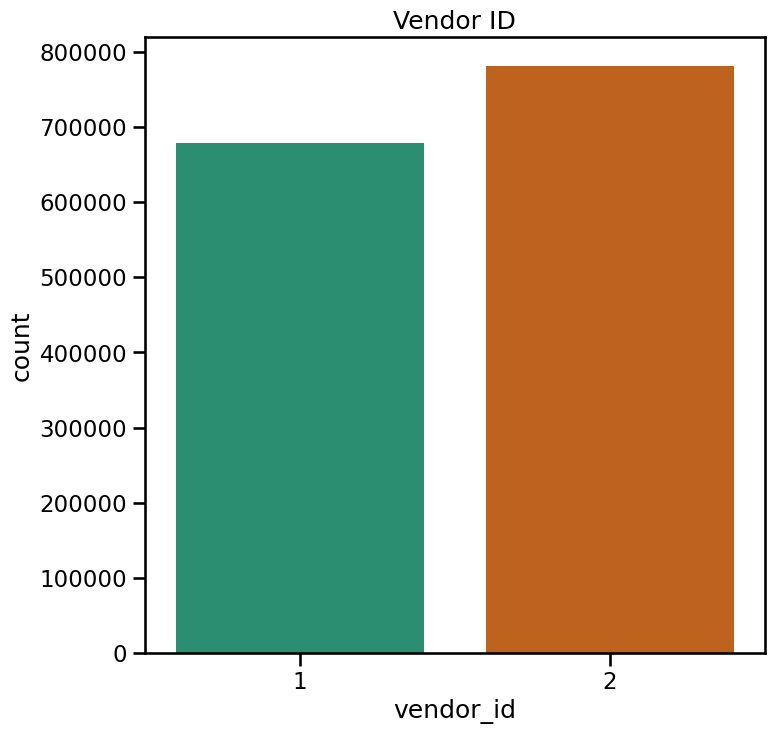

In [10]:
sns.set_context('talk')

plt.figure(figsize=(8,8))
sns.countplot(train_data['vendor_id'], palette='Dark2')
plt.title("Vendor ID")


Text(0.5, 1.0, 'Store and Forward Flag')

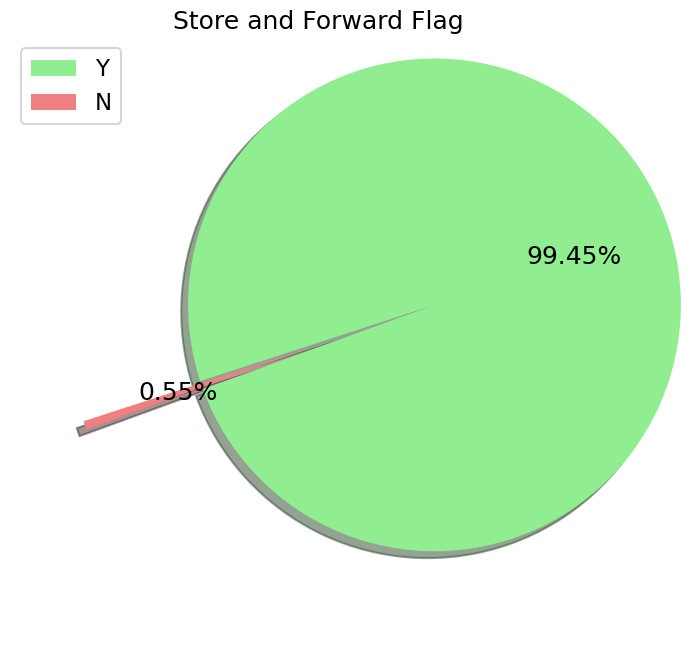

In [11]:
plt.figure(figsize=(8,8))
plt.pie(train_data['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['store_and_fwd_flag'] = le.fit_transform(train_data['store_and_fwd_flag'])
train_data['vendor_id'] = le.fit_transform(train_data['vendor_id'])

C:\Users\cyphe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passenger Count Distribution')

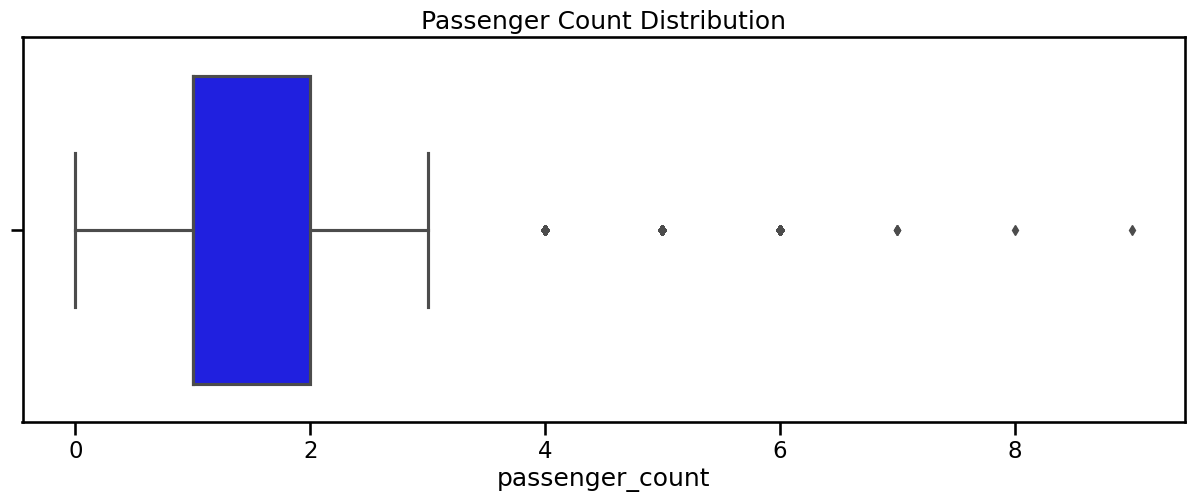

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(train_data['passenger_count'], color='blue')
plt.title('Passenger Count Distribution')


C:\Users\cyphe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Transformed - Trip Duration')

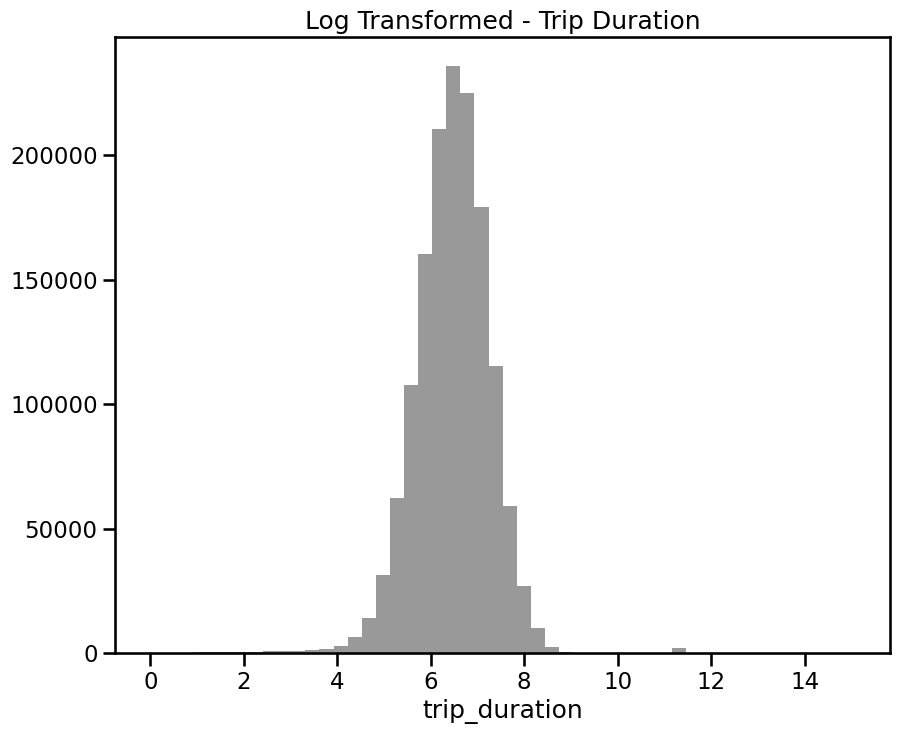

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(train_data['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

In [15]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])

train_data['pickup_day'] = train_data['pickup_datetime'].dt.day
train_data['pickup_month'] = train_data['pickup_datetime'].dt.month
train_data['pickup_date'] = train_data['pickup_datetime'].dt.date
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data['pickup_min'] = train_data['pickup_datetime'].dt.minute
train_data['pickup_weekday'] = train_data['pickup_datetime'].dt.weekday

train_data['dropoff_min'] = train_data['dropoff_datetime'].dt.minute


C:\Users\cyphe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall Monthly trips')

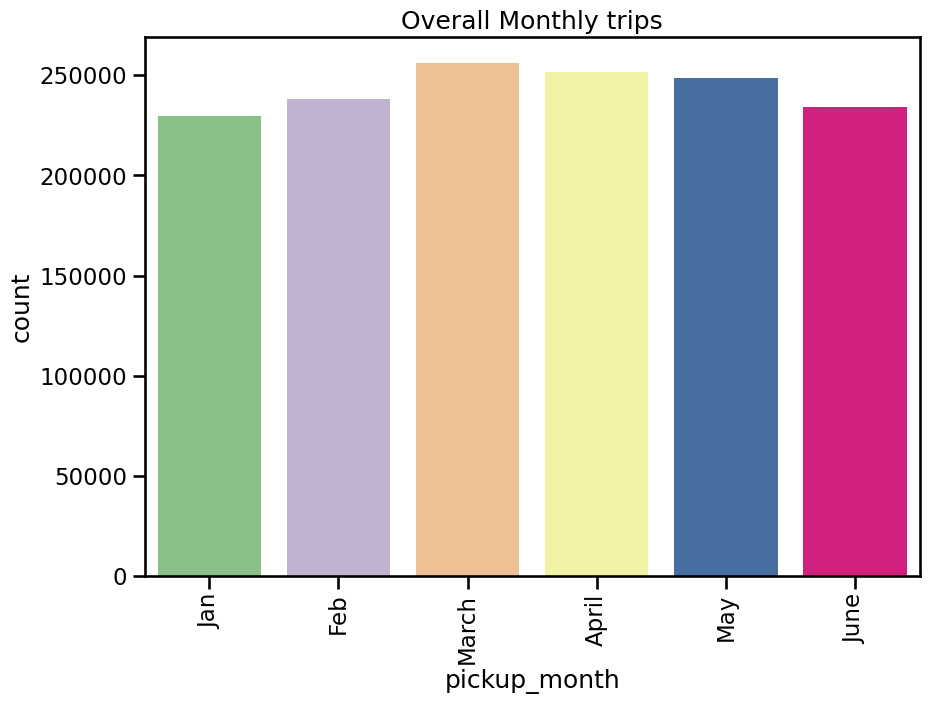

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(train_data['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

In [17]:
train_data = train_data.drop(['id','pickup_datetime','pickup_date','dropoff_datetime'], axis=1)
train_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,17,24,0,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,0,43,6,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,11,35,1,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,19,32,2,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,13,30,5,38


In [18]:
# Normalizing the dataset
X = train_data.drop(["trip_duration"], axis = 1)
y = np.log(train_data['trip_duration'])

In [19]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
sc_x = StandardScaler()
new_df = sc_x.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.074471,-0.172813,-0.307440,0.530263,-0.322670,-1.561062,0.136139
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,-0.074471,-0.402616,1.477173,-2.126116,0.774030,1.509502,1.399039
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,-0.074471,0.401692,-1.497182,-0.407283,0.312262,-1.049301,-1.126761
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.074471,-1.092023,0.287431,0.842778,0.139099,-0.537541,0.537971
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.074471,1.206001,-0.307440,-0.094768,0.023657,0.997741,0.480566


In [20]:
X = new_df

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(train_data.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.14409795, 0.10874783, 0.10046737, 0.08575584, 0.08327229,
       0.07812324, 0.07600604, 0.0757774 , 0.07020683, 0.06811033,
       0.05427252, 0.03908354, 0.01607881])

In [22]:
pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([1.87327459, 1.4137228 , 1.30607674, 1.11482673, 1.08254045,
       1.01560276, 0.98807923, 0.9851069 , 0.91268938, 0.88543493,
       0.70554326, 0.50808643])

In [23]:
X = transform
y = np.log(train_data['trip_duration']).values

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1021050, 12), (437594, 12), (1021050,), (437594,))

In [25]:
from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.40949572, 6.38974715, 6.58234517, ..., 6.49740393, 6.39593293,
       6.55841163])

In [26]:
print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))


Training Score :  0.04244450511791209
Validation Score :  0.04389207995585587
Cross Validation Score :  -0.04858344200260267
R2_Score :  -23.101354376046675


In [27]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))


Null RMSLE :  0.11464018891653321


In [28]:
from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


array([6.58041548, 7.50469126, 6.16268944, ..., 6.96234437, 7.61373356,
       6.51030877])

In [29]:
print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.9258236409034742
Validation Score :  0.9165689335991868


C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\tree\_classes.py:

Cross Validation Score :  0.9136837131570639
R2_Score :  0.9100759406757712
RMSLE :  0.03756182215431584


In [30]:
test_data = pd.read_csv("C:/Users/cyphe/OneDrive/Desktop/Nyc- taxi-trip-duration/test/test.csv")
test_ids = test_data["id"]
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [31]:
print("Total number of trips = {:,}".format(len(test_data)))

Total number of trips = 625,134


C:\Users\cyphe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Vendor ID')

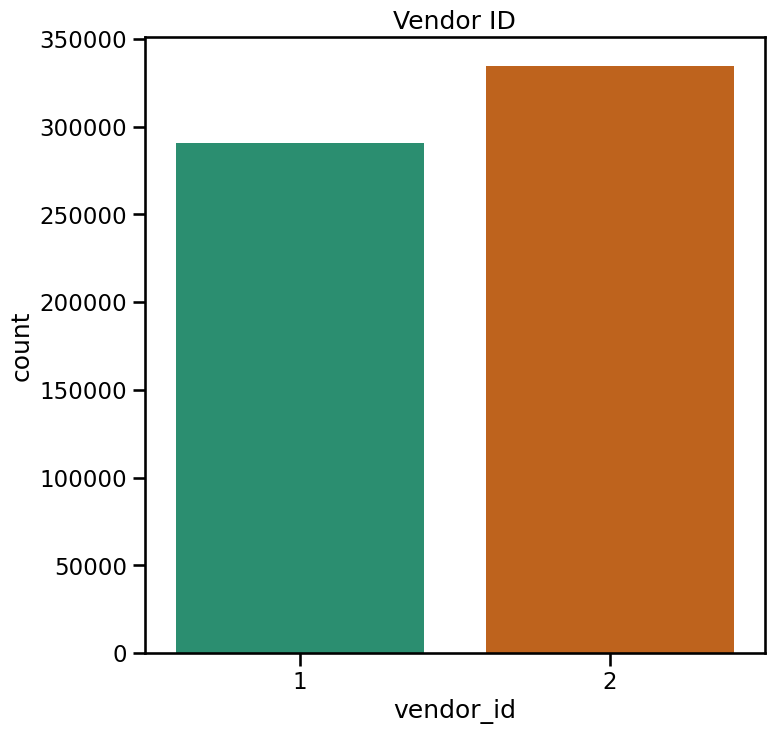

In [32]:
sns.set_context('talk')

plt.figure(figsize=(8,8))
sns.countplot(test_data['vendor_id'], palette='Dark2')
plt.title("Vendor ID")


Text(0.5, 1.0, 'Store and Forward Flag')

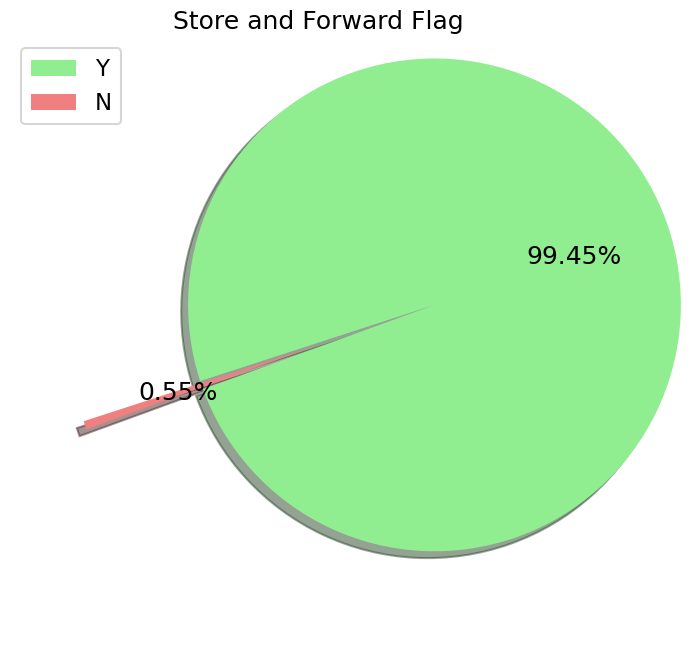

In [33]:
plt.figure(figsize=(8,8))
plt.pie(test_data['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

In [34]:
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])
test_data['pickup_day'] = test_data['pickup_datetime'].dt.day
test_data['pickup_month'] = test_data['pickup_datetime'].dt.month
test_data['pickup_date'] = test_data['pickup_datetime'].dt.date
test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour
test_data['pickup_min'] = test_data['pickup_datetime'].dt.minute
test_data['pickup_weekday'] = test_data['pickup_datetime'].dt.weekday

In [35]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,30,6,2016-06-30,23,59,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,30,6,2016-06-30,23,59,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,30,6,2016-06-30,23,59,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,30,6,2016-06-30,23,59,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,30,6,2016-06-30,23,59,3


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['store_and_fwd_flag'] = le.fit_transform(test_data['store_and_fwd_flag'])
test_data['vendor_id'] = le.fit_transform(test_data['vendor_id'])

In [37]:
test_data = test_data.drop(['id','pickup_datetime','pickup_date'], axis=1)
test_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday
0,0,1,-73.988129,40.732029,-73.990173,40.756680,0,30,6,23,59,3
1,0,1,-73.964203,40.679993,-73.959808,40.655403,0,30,6,23,59,3
2,0,1,-73.997437,40.737583,-73.986160,40.729523,0,30,6,23,59,3
3,1,1,-73.956070,40.771900,-73.986427,40.730469,0,30,6,23,59,3
4,0,1,-73.970215,40.761475,-73.961510,40.755890,0,30,6,23,59,3


In [38]:
test_data.isna().sum()

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
pickup_day            0
pickup_month          0
pickup_hour           0
pickup_min            0
pickup_weekday        0
dtype: int64

In [39]:
submission_pred = est_dt.predict(test_data)

C:\Users\cyphe\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [40]:
df = pd.DataFrame({"id": test_ids.values,
                  "trip_duration": submission_pred
                  })


In [41]:
df.to_csv("submission_rep.csv" , index = False)